Simple Linear Regression Metrics:
Mean Squared Error: 0.00695240723820063
R-squared: 0.9024461774180499

Lasso Regression Metrics:
Mean Squared Error: 0.008071071653750659
R-squared: 0.8867494573922603

Ridge Regression Metrics:
Mean Squared Error: 0.006970079709535172
R-squared: 0.9021982032885021



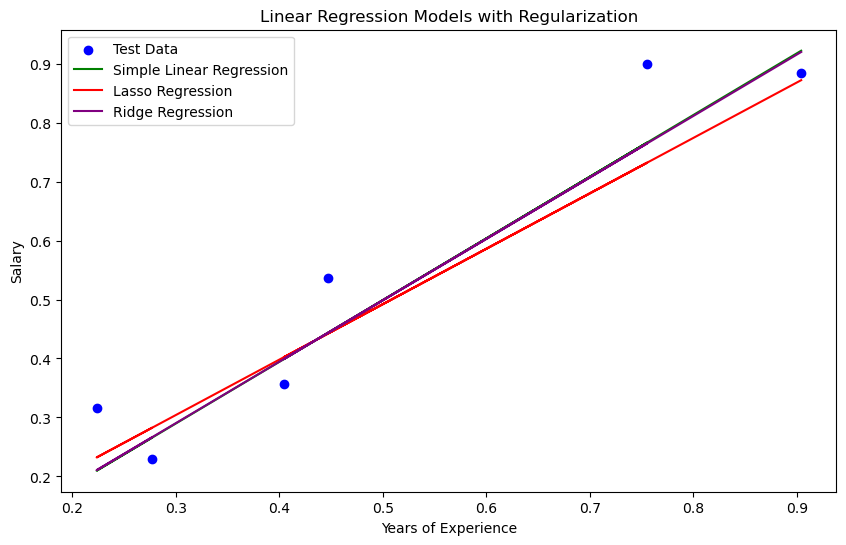

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
data = pd.read_csv('Salary_dataset.csv')

# Extract independent and dependent variables
X = data[['YearsExperience']]
y = data['Salary']

independent_variable=data['YearsExperience'].values.reshape(-1,1)
dependent_variable=data['Salary'].values.reshape(-1,1)

X=independent_variable
y=dependent_variable

import numpy as np

X_norm = (X - np.min(X)) / (np.max(X) - np.min(X))
y_norm = (y - np.min(y)) / (np.max(y) - np.min(y))

X = X_norm
y = y_norm

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a simple linear regression model
simple_model = LinearRegression()
simple_model.fit(X_train, y_train)
y_pred_simple = simple_model.predict(X_test)

# Fit a Lasso regression model (L1 regularization)
lasso_model = Lasso(alpha=0.01)  # You can adjust the alpha value
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Fit a Ridge regression model (L2 regularization)
ridge_model = Ridge(alpha=0.01)  # You can adjust the alpha value
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Print evaluation metrics
def print_metrics(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{model_name} Metrics:')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')
    print()

print_metrics(y_test, y_pred_simple, 'Simple Linear Regression')
print_metrics(y_test, y_pred_lasso, 'Lasso Regression')
print_metrics(y_test, y_pred_ridge, 'Ridge Regression')

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Test Data')
plt.plot(X_test, y_pred_simple, color='green', label='Simple Linear Regression')
plt.plot(X_test, y_pred_lasso, color='red', label='Lasso Regression')
plt.plot(X_test, y_pred_ridge, color='purple', label='Ridge Regression')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression Models with Regularization')
plt.legend()
plt.show()
